In [1]:
# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18

from scipy.integrate import quad
from scipy.optimize import curve_fit

# Total cross sections

In [2]:
# TOTAL CROSS SECTIONS
sigma_inc = (2.05*6+0.001*3+4.232*3)/12
sigma_coh = (5.592*6+5.551*3+0.0008*3)/12

## The S(Q) FOR NORMALIZATION

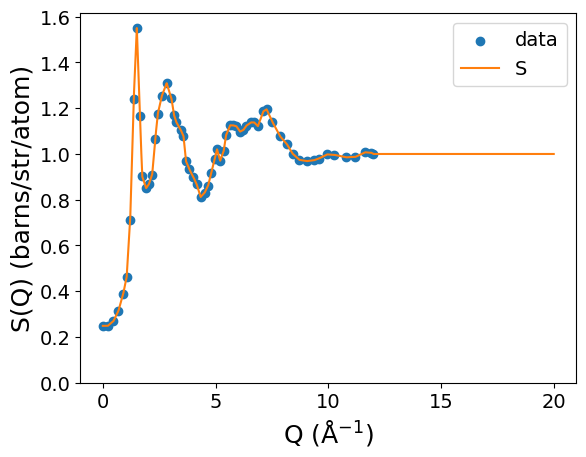

In [3]:
dataSq = np.loadtxt('./data/MSdata/info/Gly_Sq.csv', delimiter=',')
dataSq[:,1] = (dataSq[:,1] +3) /3
Sq = lambda x: np.interp(x, dataSq[:,0], dataSq[:,1])

X = np.linspace(0,20,10000)
plt.figure()
plt.scatter(dataSq[:,0], dataSq[:,1], label='data')
plt.plot(X, Sq(X), label='S', c='C1')

plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('S(Q) (barns/str/atom)')
plt.ylim(0)
plt.legend()

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_168260/1507095579.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(X, sigma_coh/(4*np.pi) * Y, label='$\sigma_{coh}/4\pi$ S(Q)', color='C0')
/tmp/ipykernel_168260/1507095579.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(X, sigma_inc/(4*np.pi) * np.ones(len(Y)), label='$\sigma_{inc}/4\pi$', color='C1')
/tmp/ipykernel_168260/1507095579.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(X, sigma_coh/(4*np.pi) * Y + sigma_inc/(4*np.pi), label='$\sigma_{coh}/4\pi$ S(Q) + $\sigma_{inc}/4\pi$', color='C2')


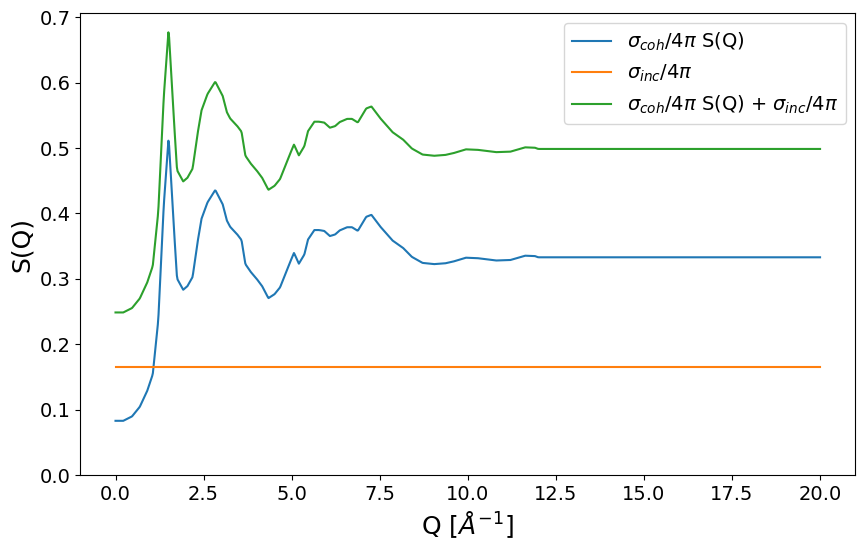

In [ ]:
plt.figure(figsize=(10, 6))

X = np.linspace(0, 20, 1000)
Y = Sq(X)
plt.plot(X, sigma_coh/(4*np.pi) * Y, label='$\sigma_{coh}/4\pi$ S(Q)', color='C0')
plt.plot(X, sigma_inc/(4*np.pi) * np.ones(len(Y)), label='$\sigma_{inc}/4\pi$', color='C1')
# total
plt.plot(X, sigma_coh/(4*np.pi) * Y + sigma_inc/(4*np.pi), label='$\sigma_{coh}/4\pi$ S(Q) + $\sigma_{inc}/4\pi$', color='C2')


#plt.ylim(0)
plt.xlabel(r'Q [$\\AA^{-1}$]')
plt.ylabel('S(Q)')
plt.ylim(0)
plt.legend()

# S(Q,$\omega$) for multiple scattering simulation

## Debye-Waller factor

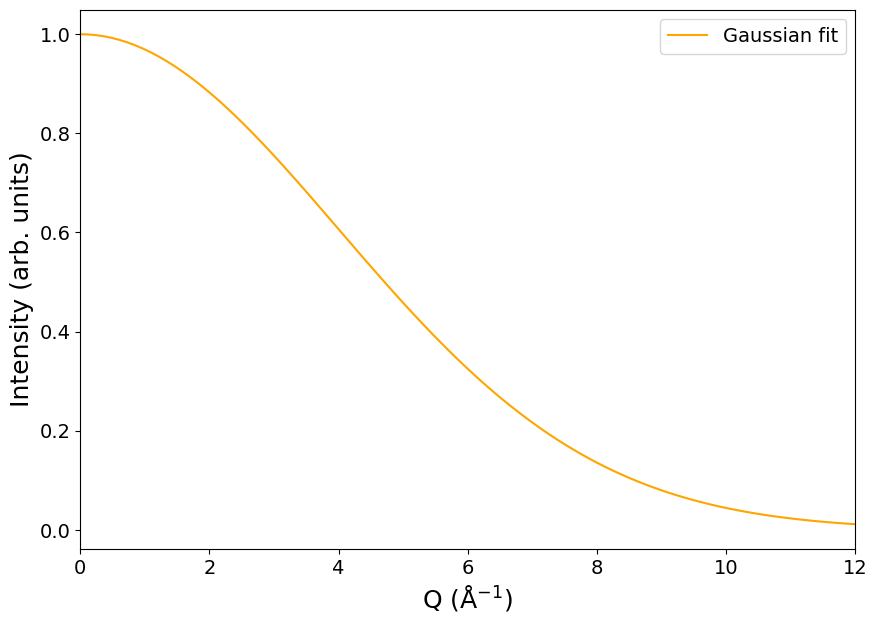

In [5]:
###################
sigma_DBW = 4
###################

### Debey-Waller lambda ###
DBW = lambda x, sigma_DBW: np.exp(-(x)**2/(2*sigma_DBW**2))

#plot
plt.figure(figsize=(10,7))
gauss = lambda x, A, sigma: A*np.exp(-(x)**2/(2*sigma**2))

X = np.linspace(0,12,100)
plt.plot(X, DBW(X, sigma_DBW), label='Gaussian fit', c='orange')


plt.xlim(0,12)
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.legend()

## Elastic Gamma


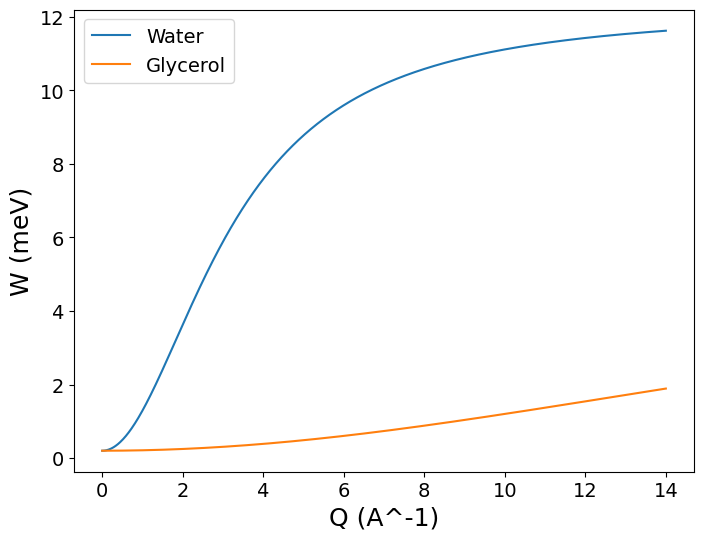

In [6]:
# DATA FOR WATER

D0 = 2.e-5 #cm^2 s^-1
D0 = D0 * 1e4 # A^2 ps^-1
tau = .5 #ps
hbar = 6-582119514e-13 #meV s
GammaEl = lambda Q: hbar*D0*Q**2/(1+tau*D0*Q**2) + 0.2

plt.figure(figsize=(8,6))
Q = np.linspace(0, 14, 1000)
plt.plot(Q, GammaEl(Q), label='Water')

# GLYCEROL GETS A FACTOR 100 LESS !!!
tau = 1
D0 = 2.e-5/100 #cm^2 s^-1
D0 = D0 * 1e4 # A^2 ps^-1
GammaEl = lambda Q: hbar*D0*Q**2/(1+tau*D0*Q**2) + 0.2
plt.plot(Q, GammaEl(Q), label='Glycerol')

plt.xlabel('Q (A^-1)')
plt.ylabel('W (meV)')
plt.legend()

## The inelastic gamma
This can be extimated from the speed of sound, assuming a relation
$$
\Omega_s = c_s q
$$
$$
\Gamma_s \simeq \Omega_s = c_s q
$$
so that the width of the inelastic plateau becomes
$$
width = \Omega_s + \Gamma_s/2 = c_s q + c_s q/2 = 3/2 \Gamma_s
$$
Note that the liquids speed of sound is (for Benzene) 1298 m/s.
Moving from $c_s[m/s]$ to $c_s[meV\AA]$ we have
$$
c_s[meV\AA] = 2 * c_s[m/s] \times 6.58 \times 10^{-3}
$$

cs [meVA] = 12.528319999999999


Text(0, 0.5, 'Gamma [meV]')

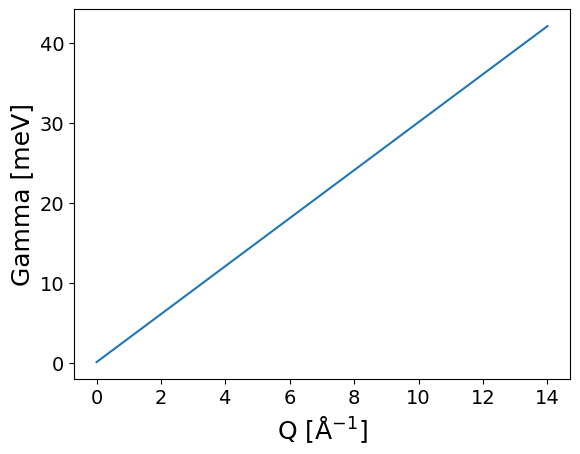

In [7]:
###########################
c = 3
###########################
print('cs [meVA] =', 1904 * 6.58e-3)

GammaInel = lambda Q, c: c * Q + .1

Q = np.linspace(0, 14, 1000)
plt.plot(Q, GammaInel(Q, c), label='Inelastic scattering')
plt.xlabel('Q [Å$^{-1}$]')
plt.ylabel('Gamma [meV]')

## The elastic - inelastic model
The following are the ingredients.

In [8]:
# Population factor
kB = 8.617333262e-2 # meV/K
eps = .000001
d_balance = lambda omega, T: (omega+eps)/(kB*T) * (1/(np.exp((omega+eps) / (kB*T)) - 1) + 1)

Text(0, 0.5, 'Population factor (T=200K)')

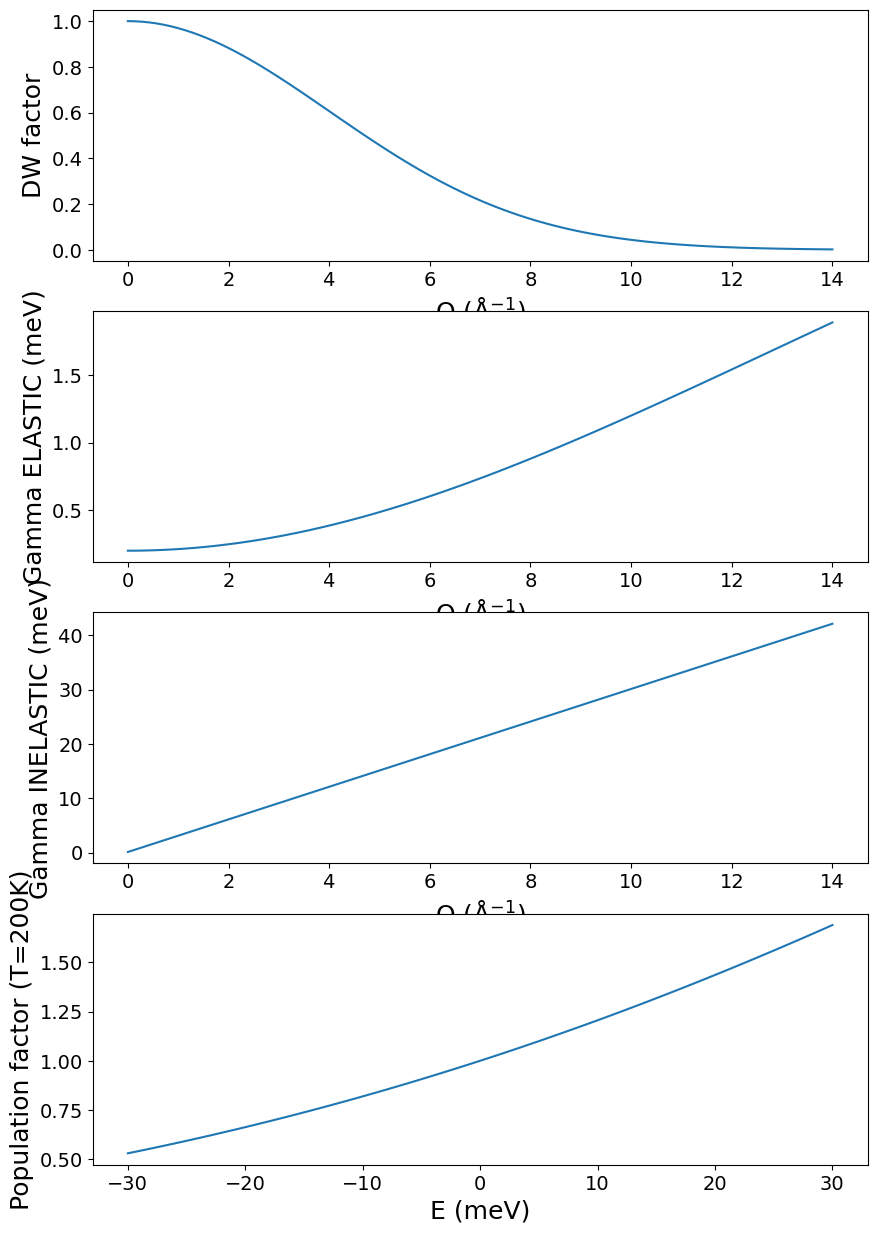

In [9]:
# plots
ax, fig = plt.subplots(4,1, figsize=(10,15))
X = np.linspace(0,14,100)
fig[0].plot(X, DBW(X, sigma_DBW), label='DBW')
fig[0].set_ylabel('DW factor')
fig[0].set_xlabel('Q (Å$^{-1}$)')
fig[1].plot(X, GammaEl(X), label='Elastic')
fig[1].set_ylabel('Gamma ELASTIC (meV)')
fig[1].set_xlabel('Q (Å$^{-1}$)')
fig[2].plot(X, GammaInel(X,c), label='Inelastic')
fig[2].set_xlabel('Q (Å$^{-1}$)')
fig[2].set_ylabel('Gamma INELASTIC (meV)')

X = np.linspace(-30,30,100)
fig[3].plot(X, d_balance(X, 300), label='Population factor')
fig[3].set_xlabel('E (meV)')
fig[3].set_ylabel('Population factor (T=200K)')

In [10]:
Sel = lambda Q, omega: 1/np.pi * (GammaEl(Q) / (omega**2 + GammaEl(Q)**2))

#Sinel = lambda Q, omega, c: 1/np.pi * (GammaInel(Q, c) / (omega**2 + GammaInel(Q, c)**2))
#Sinel = lambda Q, E: 1/(3*np.pi*GammaInel(Q)) * (np.arctan(E+3/2*GammaInel(Q)) - np.arctan(E-3/2*GammaInel(Q)))
Sinel = lambda Q, omega, minel: 1/np.sqrt(2*np.pi*GammaInel(Q, minel)**2) * np.exp(-omega**2/(2*GammaInel(Q, minel)**2))

(-50.0, 50.0)

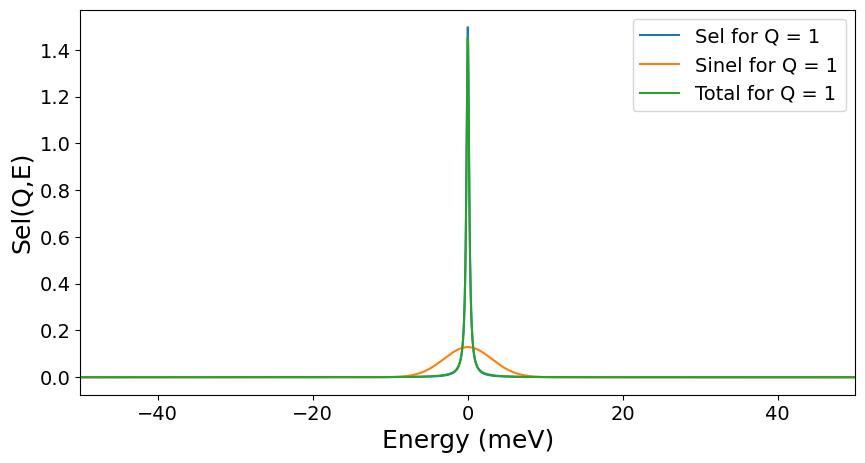

In [11]:
########
q = 1
########

plt.figure(figsize=(10,5))
X = np.linspace(-120,120,10000)
plt.plot(X, Sel(q, X), label='Sel for Q = '+str(q))
plt.plot(X, Sinel(q, X, c), label='Sinel for Q = '+str(q))
plt.plot(X, DBW(q, sigma_DBW)*Sel(q, X) + (1-DBW(q, sigma_DBW))*Sinel(q, X, c), label='Total for Q = '+str(q))
plt.xlabel('Energy (meV)')
plt.ylabel('Sel(Q,E)')
plt.legend()
plt.xlim(-50,50)

# The final S model

### Sumup for the hole construction of the S(Q,$\omega$) model

In [12]:

# Population factor
kB = 8.617333262e-2 # meV/K
eps = .000001
d_balance = lambda omega, T: (omega+eps)/(kB*T) * (1/(np.exp((omega+eps) / (kB*T)) - 1) + 1)

Text(0, 0.5, 'Normalization factor')

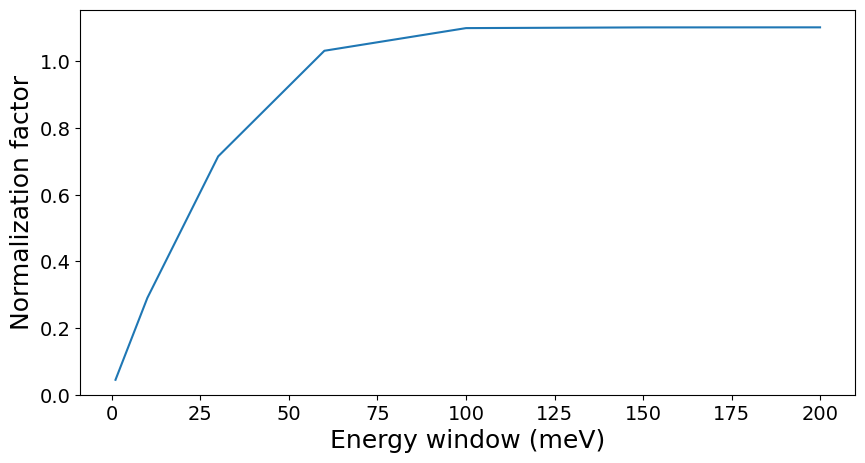

In [13]:
Q = 10
T = 300
X = [1, 10, 30, 60, 100, 150, 200]
out = []
for x in X:
    omega_max = omega_min = x

    S_tonorm = lambda omega: (DBW(Q, sigma_DBW) * Sel(Q, omega) + (1-DBW(Q, sigma_DBW)) * Sinel(Q, omega, c)) * d_balance(omega, T)
    norm = quad(S_tonorm, -omega_min, omega_max)[0]
    out.append(norm)

# plot
plt.figure(figsize=(10,5))
plt.plot(X, out)

plt.ylim(0)
plt.xlabel('Energy window (meV)')
plt.ylabel('Normalization factor')

In [14]:
# The FINAL MODEL
def S_model(Q, omega, T):
    omega_min = -200
    omega_max = 200

    S_tonorm = lambda omega: (DBW(Q, sigma_DBW) * Sel(Q, omega) + (1-DBW(Q, sigma_DBW)) * Sinel(Q, omega, c)) * d_balance(omega, T)
    norm = quad(S_tonorm, omega_min, omega_max)[0]
    return S_tonorm(omega) / norm * (sigma_coh/(4*np.pi) * Sq(Q) + sigma_inc/(4*np.pi))

In [15]:
def S_model_test1(Q, omega, T):

    # Debey-Waller lambda
    sigma_DBW = 4.

    # Inelastic Gamma
    c = 2

    omega_min = -200
    omega_max = 200

    S_tonorm = lambda omega: (DBW(Q, sigma_DBW) * Sel(Q, omega) + (1-DBW(Q, sigma_DBW)) * Sinel(Q, omega, c)) * d_balance(omega, T)
    norm = quad(S_tonorm, omega_min, omega_max)[0]
    return S_tonorm(omega) / norm * (sigma_coh/(4*np.pi) * Sq(Q) + sigma_inc/(4*np.pi))


def S_model_test2(Q, omega, T):

    # Debey-Waller lambda
    sigma_DBW = 10.

    # Inelastic Gamma
    c = 2

    omega_min = -200
    omega_max = 200

    S_tonorm = lambda omega: (DBW(Q, sigma_DBW) * Sel(Q, omega) + (1-DBW(Q, sigma_DBW)) * Sinel(Q, omega, c)) * d_balance(omega, T)
    norm = quad(S_tonorm, omega_min, omega_max)[0]
    return S_tonorm(omega) / norm * (sigma_coh/(4*np.pi) * Sq(Q) + sigma_inc/(4*np.pi))


def S_model_test3(Q, omega, T):

    # Debey-Waller lambda
    sigma_DBW = 6

    # Inelastic Gamma
    c = 1

    omega_min = -200
    omega_max = 200

    S_tonorm = lambda omega: (DBW(Q, sigma_DBW) * Sel(Q, omega) + (1-DBW(Q, sigma_DBW)) * Sinel(Q, omega, c)) * d_balance(omega, T)
    norm = quad(S_tonorm, omega_min, omega_max)[0]
    return S_tonorm(omega) / norm * (sigma_coh/(4*np.pi) * Sq(Q) + sigma_inc/(4*np.pi))


def S_model_test4(Q, omega, T):

    # Debey-Waller lambda
    sigma_DBW = 6

    # Inelastic Gamma
    c = 4
    omega_min = -200
    omega_max = 200

    S_tonorm = lambda omega: (DBW(Q, sigma_DBW) * Sel(Q, omega) + (1-DBW(Q, sigma_DBW)) * Sinel(Q, omega, c)) * d_balance(omega, T)
    norm = quad(S_tonorm, omega_min, omega_max)[0]
    return S_tonorm(omega) / norm * (sigma_coh/(4*np.pi) * Sq(Q) + sigma_inc/(4*np.pi))

(5e-05, 1.5223938906583547)

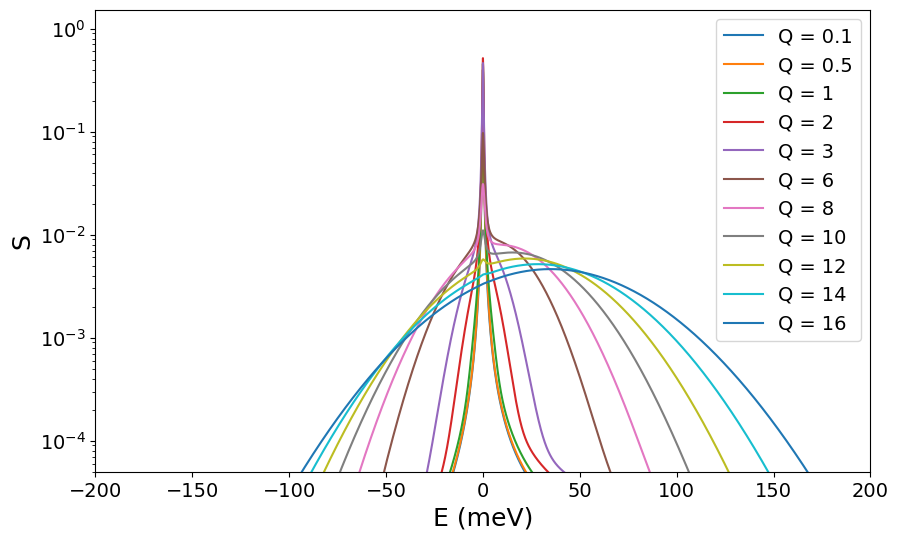

In [16]:
plt.figure(figsize=(10,6))

omega = np.arange(-200, 200, .1)

for q in [.1, .5, 1, 2, 3, 6, 8, 10, 12, 14, 16]:
    plt.plot(omega, S_model(q, omega, 300), label='Q = '+str(q))

plt.xlabel('E (meV)')
plt.ylabel('S')
plt.legend()
plt.yscale('log')
plt.xlim(-200,200)

plt.ylim(5e-5)

Text(0, 0.5, 'Integrated S(Q,E) (barns/str/atom)')

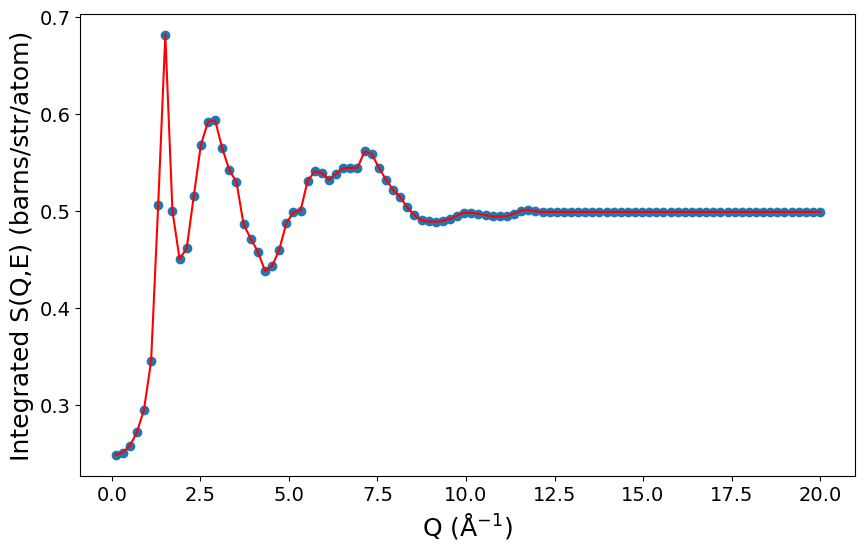

In [17]:
omega = np.linspace(-200, 200, 10000)
q = np.linspace(0.1, 20, 100)

Sq_int = [S_model(qi, omega, 300).sum()*(omega[1]-omega[0]) for qi in q]

# plot of the integral of the above
plt.figure(figsize=(10,6))

plt.scatter(q, Sq_int)
plt.plot(q, sigma_coh/(4*np.pi) * Sq(q) + sigma_inc/(4*np.pi), c='r')

plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('Integrated S(Q,E) (barns/str/atom)')

## File generation

In [18]:
# FILE GENERATION
Qmin, Qmax, dQ = .2, 17, .05
omega_min, omega_max, domega = -100, 100, .2

Q_vec = np.arange(Qmin, Qmax, dQ)
omega_vec = np.arange(omega_min, omega_max, domega)

In [19]:
T_d6 = [160, 200, 300]

for T in T_d6:
    S_mesh = np.array([S_model(Qmin, omega_vec, T)])
    for q in Q_vec[1:]:
        S_mesh = np.vstack((S_mesh, S_model(q, omega_vec, T )))
    np.save('./data/MSdata/Sqw/Sqw_'+str(T)+'K', S_mesh)
np.save('./data/MSdata/Sqw/Q_vec', Q_vec)
np.save('./data/MSdata/Sqw/omega_vec', omega_vec)

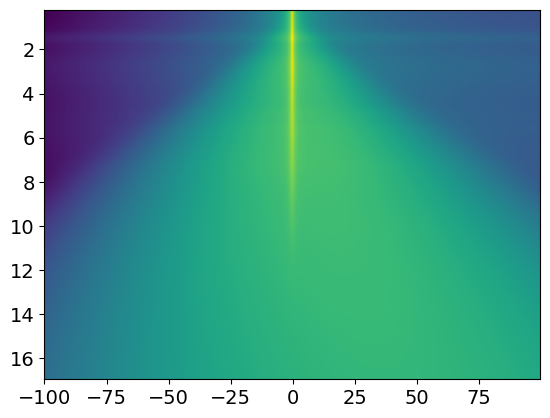

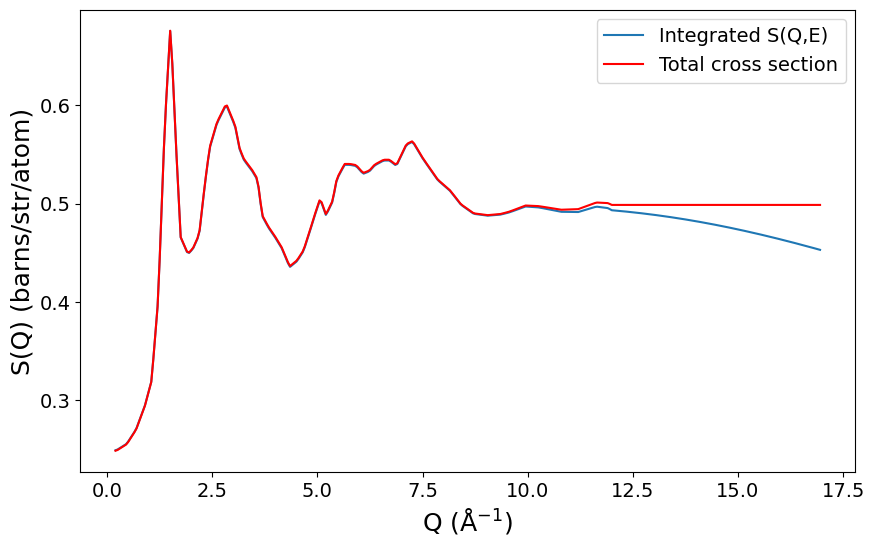

In [20]:
# LOAD EXAMPLE
S_mesh = np.load('./data/MSdata/Sqw/Sqw_300K.npy')
Q_vec = np.load('./data/MSdata/Sqw/Q_vec.npy')
omega_vec = np.load('./data/MSdata/Sqw/omega_vec.npy')

plt.imshow(S_mesh, aspect='auto', extent = [omega_vec[0], omega_vec[-1], Q_vec[-1], Q_vec[0]], norm='log')

plt.figure(figsize=(10,6))
plt.plot(Q_vec, S_mesh.sum(axis=1)*domega, label='Integrated S(Q,E)')

plt.plot(Q_vec, (sigma_coh/(4*np.pi) * Sq(Q_vec) + sigma_inc/(4*np.pi)), c='r', label='Total cross section')
plt.xlabel('Q (Å$^{-1}$)')
plt.ylabel('S(Q) (barns/str/atom)')
plt.legend()


## Alternative models for model-dependence test

### Test 1

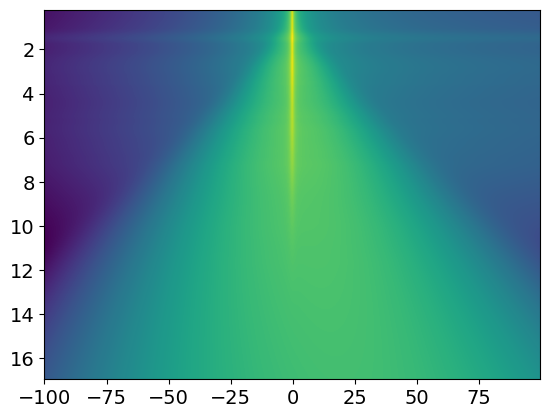

In [21]:
T = 300
S_mesh = np.array([S_model_test1(Qmin, omega_vec, T)])
for q in Q_vec[1:]:
    S_mesh = np.vstack((S_mesh, S_model_test1(q, omega_vec, T )))

np.save('./data/MSdata/Sqw/Sqw_'+str(T)+'K_test1', S_mesh)

# show S_mesh
plt.imshow(S_mesh, aspect='auto', extent = [omega_vec[0], omega_vec[-1], Q_vec[-1], Q_vec[0]], norm='log')

### Test 2

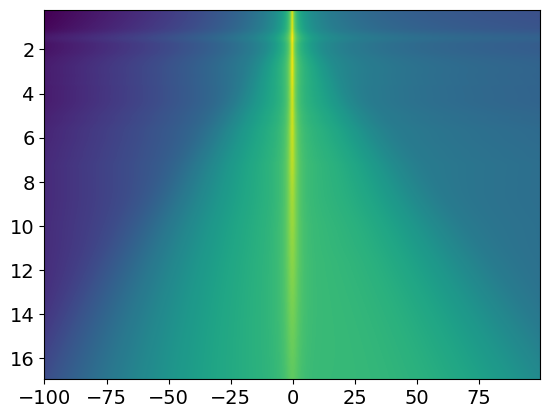

In [22]:
T = 300
S_mesh = np.array([S_model_test2(Qmin, omega_vec, T)])
for q in Q_vec[1:]:
    S_mesh = np.vstack((S_mesh, S_model_test2(q, omega_vec, T )))

np.save('./data/MSdata/Sqw/Sqw_'+str(T)+'K_test2', S_mesh)

# show S_mesh
plt.imshow(S_mesh, aspect='auto', extent = [omega_vec[0], omega_vec[-1], Q_vec[-1], Q_vec[0]], norm='log')

### Test 3

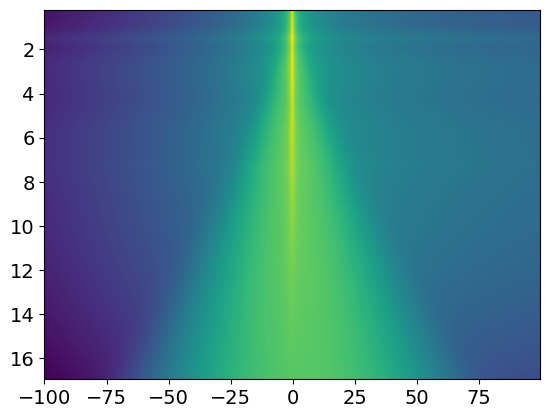

In [23]:
T = 300
S_mesh = np.array([S_model_test3(Qmin, omega_vec, T)])
for q in Q_vec[1:]:
    S_mesh = np.vstack((S_mesh, S_model_test3(q, omega_vec, T )))

np.save('./data/MSdata/Sqw/Sqw_'+str(T)+'K_test3', S_mesh)

# show S_mesh
plt.imshow(S_mesh, aspect='auto', extent = [omega_vec[0], omega_vec[-1], Q_vec[-1], Q_vec[0]], norm='log')

### Test 4

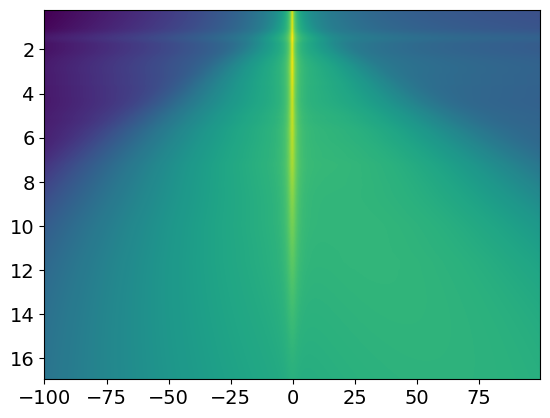

In [24]:
T = 300
S_mesh = np.array([S_model_test4(Qmin, omega_vec, T)])
for q in Q_vec[1:]:
    S_mesh = np.vstack((S_mesh, S_model_test4(q, omega_vec, T )))

np.save('./data/MSdata/Sqw/Sqw_'+str(T)+'K_test4', S_mesh)

# show S_mesh
plt.imshow(S_mesh, aspect='auto', extent = [omega_vec[0], omega_vec[-1], Q_vec[-1], Q_vec[0]], norm='log')